In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
# import data set

url = 'https://raw.githubusercontent.com/YaleGu/QM_final/main/QM_final.csv'
df= pd.read_csv(url, index_col=0)
df

,schools,Student per class,Graduates/Total Students,Total Students/Total teachers,Entrants,total current students,Total teachers,classroom area,area for outdoor exercise,Books & Magazines in Libraries (Volume)
Region,,,,,,,,,,
Beijing,20,21.688474,0.199081,6.989960,1026,6962,996,66946.50,253517.42,297906
Tianjin,21,15.101227,0.103595,7.325893,878,4923,672,47972.26,192681.60,105871
Hebei,163,16.036473,0.102176,8.268033,5733,29459,3563,255031.02,1282184.93,564972
Shanxi,80,18.806154,0.124236,8.508585,4046,18336,2155,98963.49,487973.74,256643
Inner Mongolia,51,19.992436,0.129550,7.875447,2209,13215,1678,107053.52,632223.88,171814
Liaoning,83,14.836689,0.133519,6.023615,1979,13264,2202,129266.92,674351.39,567816
Jilin,49,17.872038,0.124635,6.806859,2095,11313,1662,104049.14,554896.50,195077
Heilongjiang,72,13.833771,0.090817,7.847146,2568,15812,2015,120398.06,602379.94,299436
Shanghai,31,14.713768,0.177296,5.847372,1322,8122,1389,99355.56,332476.26,383467


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Beijing to Xinjiang
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   schools                                  31 non-null     int64  
 1   Student per class                        31 non-null     float64
 2   Graduates/Total Students                 31 non-null     float64
 3   Total Students/Total teachers            31 non-null     float64
 4   Entrants                                 31 non-null     int64  
 5   total current students                   31 non-null     int64  
 6   Total teachers                           31 non-null     int64  
 7   classroom area                           31 non-null     float64
 8   area for outdoor exercise                31 non-null     float64
 9   Books & Magazines in Libraries (Volume)  31 non-null     int64  
dtypes: float64(5), int64(5)
memory usage: 2.7+ KB

In [4]:
df.corr().style.background_gradient(cmap='Blues')

,schools,Student per class,Graduates/Total Students,Total Students/Total teachers,Entrants,total current students,Total teachers,classroom area,area for outdoor exercise,Books & Magazines in Libraries (Volume)
schools,1.000000,-0.389163,-0.115705,-0.254772,0.756757,0.776597,0.924832,0.892001,0.881387,0.823791
Student per class,-0.389163,1.000000,-0.074419,0.831355,0.081210,0.044783,-0.400865,-0.317523,-0.355348,-0.461710
Graduates/Total Students,-0.115705,-0.074419,1.000000,-0.022990,-0.028922,-0.011262,-0.106508,-0.068217,-0.118690,0.081203
Total Students/Total teachers,-0.254772,0.831355,-0.022990,1.000000,0.244769,0.218061,-0.366120,-0.239874,-0.279083,-0.395987
Entrants,0.756757,0.081210,-0.028922,0.244769,1.000000,0.987942,0.686332,0.737211,0.643870,0.534577
total current students,0.776597,0.044783,-0.011262,0.218061,0.987942,1.000000,0.718026,0.778447,0.695468,0.597090
Total teachers,0.924832,-0.400865,-0.106508,-0.366120,0.686332,0.718026,1.000000,0.967633,0.946111,0.908040
classroom area,0.892001,-0.317523,-0.068217,-0.239874,0.737211,0.778447,0.967633,1.000000,0.948467,0.901778
area for outdoor exercise,0.881387,-0.355348,-0.118690,-0.279083,0.643870,0.695468,0.946111,0.948467,1.000000,0.893211
Books & Magazines in Libraries (Volume),0.823791,-0.461710,0.081203,-0.395987,0.534577,0.597090,0.908040,0.901778,0.893211,1.000000


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
df_pca=df
#rs = RobustScaler(quantile_range=(10.0, 90.0))
rs = StandardScaler()
for c in df_pca.columns.values:
    df_pca[c] = rs.fit_transform(df_pca[c].values.reshape(-1, 1))

In [6]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=9, whiten=True) 

pca.fit(df_pca)

explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_

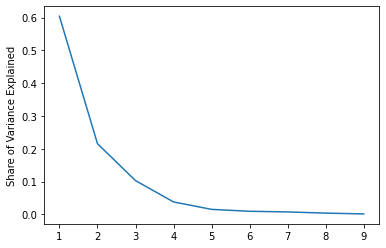

In [7]:
x = np.arange(1,len(explained_variance)+1)
plt.plot(x, explained_variance)
plt.ylabel('Share of Variance Explained')
plt.show()

In [8]:
for i in range(0, 8):
    print(f"Component {i:>2} accounts for {explained_variance[i]*100:>2.2f}% of variance")

Component  0 accounts for 60.43% of variance
Component  1 accounts for 21.58% of variance
Component  2 accounts for 10.31% of variance
Component  3 accounts for 3.81% of variance
Component  4 accounts for 1.54% of variance
Component  5 accounts for 0.96% of variance
Component  6 accounts for 0.76% of variance
Component  7 accounts for 0.40% of variance


In [9]:
keep_n_components = 3

pca = PCA(n_components=keep_n_components, whiten=True)

X_train = pca.fit_transform(df_pca)

for i in range(0, keep_n_components):
    print(f"Component {i:>2} accounts for {pca.explained_variance_ratio_[i]*100:>2.2f}% of variance")


print(len(X_train))
print(df_pca.shape[0])

print(len(X_train[0])) 

Component  0 accounts for 60.43% of variance
Component  1 accounts for 21.58% of variance
Component  2 accounts for 10.31% of variance
31
31
3


In [10]:
for x in [X_train]:
    new_columns = []
    
    for i in range(0,keep_n_components):
        new_columns.append([])

    for i in x:
        for j in range(0,keep_n_components):
            new_columns[j].append(i[j])

    for i in range(0,keep_n_components):
        df_pca[f"Component {i+1}"] = new_columns[i]

In [11]:
df_pca

,schools,Student per class,Graduates/Total Students,Total Students/Total teachers,Entrants,total current students,Total teachers,classroom area,area for outdoor exercise,Books & Magazines in Libraries (Volume),Component 1,Component 2,Component 3
Region,,,,,,,,,,,,,
Beijing,-1.182379,-0.580337,2.186951,-1.004628,-1.229706,-1.178179,-0.806226,-0.885999,-1.010839,-0.197269,-0.889016,-1.266236,2.001540
Tianjin,-1.159062,-0.986117,-0.559699,-0.956614,-1.279899,-1.306846,-1.048906,-1.070581,-1.141785,-1.049107,-1.071577,-1.235860,-0.669090
Hebei,2.151899,-0.928505,-0.600531,-0.821956,0.366620,0.241455,1.116486,0.943689,1.203304,0.987394,1.174695,-0.656774,-0.686058
Shanxi,0.216619,-0.757890,0.034045,-0.787575,-0.205507,-0.460442,0.061878,-0.574537,-0.506187,-0.380306,-0.185611,-0.740539,-0.055145
Inner Mongolia,-0.459563,-0.684815,0.186882,-0.878068,-0.828505,-0.783594,-0.295400,-0.495838,-0.195697,-0.756594,-0.466158,-0.949385,-0.007344
Liaoning,0.286569,-1.002412,0.301067,-1.142745,-0.906507,-0.780502,0.097082,-0.279745,-0.105020,1.000010,0.042205,-1.377061,0.224761
Jilin,-0.506196,-0.815433,0.045519,-1.030798,-0.867167,-0.903616,-0.307385,-0.525064,-0.362139,-0.653403,-0.494481,-1.100699,-0.130222
Heilongjiang,0.030086,-1.064193,-0.927268,-0.882113,-0.706754,-0.619715,-0.042984,-0.366022,-0.259934,-0.190483,-0.182837,-1.034615,-0.994126
Shanghai,-0.925896,-1.009984,1.560317,-1.167935,-1.129321,-1.104979,-0.511865,-0.570723,-0.840885,0.182266,-0.606384,-1.472555,1.429709


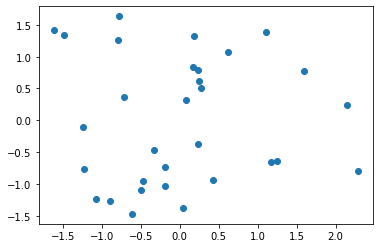

In [12]:
x=df_pca['Component 1']
y=df_pca['Component 2']
plt.scatter(x,y)

In [13]:
from scipy.cluster import hierarchy
Clustering=df_pca[['Component 1','Component 2','Component 3']]
Clustering

,Component 1,Component 2,Component 3
Region,,,
Beijing,-0.889016,-1.266236,2.001540
Tianjin,-1.071577,-1.235860,-0.669090
Hebei,1.174695,-0.656774,-0.686058
Shanxi,-0.185611,-0.740539,-0.055145
Inner Mongolia,-0.466158,-0.949385,-0.007344
Liaoning,0.042205,-1.377061,0.224761
Jilin,-0.494481,-1.100699,-0.130222
Heilongjiang,-0.182837,-1.034615,-0.994126
Shanghai,-0.606384,-1.472555,1.429709


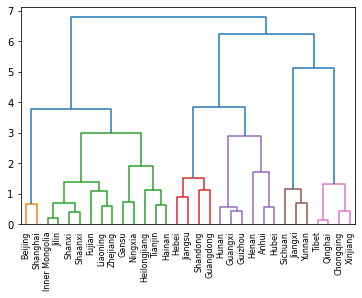

In [19]:
Z = hierarchy.linkage(Clustering, method ='ward',metric='euclidean')
hierarchy.dendrogram(Z,labels = Clustering.index,leaf_rotation=90,color_threshold=3)
plt.savefig('fig.jpg', dpi=200, bbox_inches='tight')

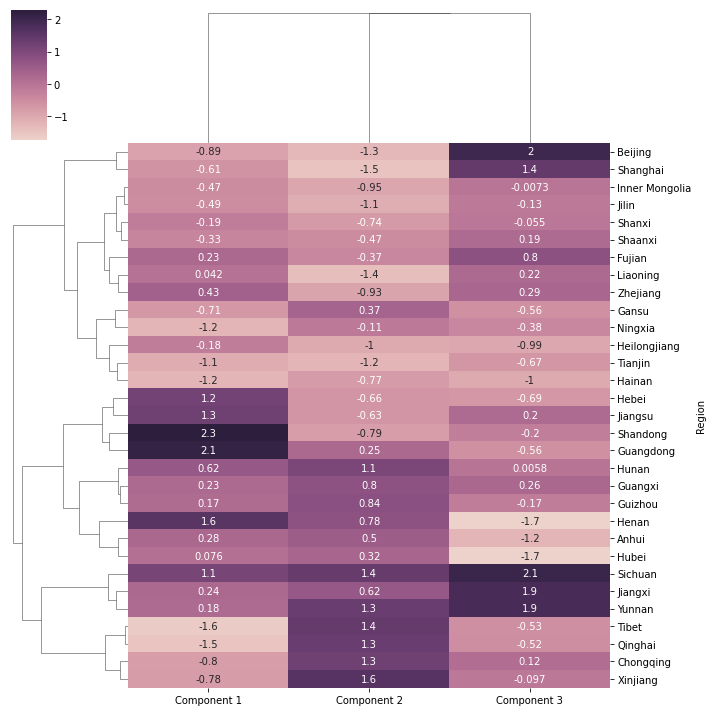

In [15]:
import seaborn as sns
fig=sns.clustermap(Clustering,method ='ward',metric='euclidean', cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

fig.savefig('fig_a.jpg', dpi = 400)